# Data Preprocessing 

Data Source: <a href="https://catalog.data.gov/dataset/nypd-calls-for-service" target=_blank> Data.gov</a> a non-federal dataset for public use. 

License: City of New York - NYC.gov. See <a href="https://www.nyc.gov/home/terms-of-use.page" target=_blank> dataset terms of use</a>

### Install Libraries, Set Environment and Import Dataset

Install required libraries using ****"pip install library_name"****, set environment variables and import the packages. Use MPLCONFIGDIR directory to store tempfile for Matplotlib. This approach is useful in cases where the user do not have the permission to write to the default Matplotlib configuration directory, or aims to prevent the accumulation of configuration files in the user's home directory. Additionally, it offers significant benefits in a multi-user setting or when it's important to guarantee that Matplotlib's configuration is reset after each program run.

In [1]:
import os #module used to provide a way of utilizing operating system dependent functionality like reading or setting environments 
import tempfile # module used for creating temporary storage locations 
os.environ["MPLCONFIGDIR"] = tempfile.gettempdir() # sets the MPLCONFIGDIR environment variable to the path returned by tempfile for Maatplotlib to store its config files

In [2]:
# import library packages
import numpy as np
import pandas as pd
import sklearn # Used as an ML model to impute missing dates and time for 1.5m datapoints
from datetime import datetime, date 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 
pd.set_option('display.max.columns', 200) # Set the data frame display option to show all columns up to 200 columns 

### Load and Preview Dataset

In [3]:
# load the data using Pandas and store it as df
nypdData = '~/Datasets/RAW/NYPD_Calls_for_Service__Year_to_Date_.csv'
df = pd.read_csv(nypdData)

Glimpse the shape of the data frame and its structure, check for missing and/or duplicated values, inspect the datatypes, and restructure dataset to enable EDA. 

In [4]:
# Display the first few rows of the dataframe to understand its structure
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,91250176,01/01/2023,12/31/2022,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2023 01:08:21 AM,01/01/2023 01:09:57 AM,NaN,01/01/2023 01:57:44 AM,40.649730,-73.936475
1,91250180,01/01/2023,12/31/2022,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:38:00 AM,01/01/2023 12:38:34 AM,01/01/2023 12:44:33 AM,01/01/2023 01:45:21 AM,40.662817,-73.881221
2,91250681,01/01/2023,12/31/2022,23:55:56,114.0,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:26 AM,01/01/2023 12:06:18 AM,NaN,01/01/2023 12:06:27 AM,40.762587,-73.912199
3,91250683,01/01/2023,12/31/2022,23:55:59,66.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:34 AM,01/01/2023 12:37:14 AM,01/01/2023 01:09:32 AM,01/01/2023 01:21:14 AM,40.610729,-73.967644
4,91250700,01/01/2023,12/31/2022,23:57:08,115.0,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:01:29 AM,01/01/2023 12:14:28 AM,01/01/2023 12:21:59 AM,01/01/2023 01:24:22 AM,40.748119,-73.891679


In [5]:
# Display how many rows and columns exist in the dataset
print ('The dataset contains,', df.shape[0], 'Rows and', df.shape[1], 'Columns.')

The dataset contains, 7050127 Rows and 18 Columns.


In [6]:
# Checking for missing values
df.isna().sum()

CAD_EVNT_ID            0
CREATE_DATE            0
INCIDENT_DATE          0
INCIDENT_TIME          0
NYPD_PCT_CD            4
BORO_NM                0
PATRL_BORO_NM          0
GEO_CD_X               0
GEO_CD_Y               0
RADIO_CODE             0
TYP_DESC               0
CIP_JOBS               0
ADD_TS                 0
DISP_TS                0
ARRIVD_TS        1503133
CLOSNG_TS             20
Latitude               0
Longitude              0
dtype: int64

In [7]:
# Checking the percentage of missing values to determine missing values handling strategy i.e. if we should drop it, fill or not
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

ARRIVD_TS        21.320651
CLOSNG_TS         0.000284
NYPD_PCT_CD       0.000057
CAD_EVNT_ID       0.000000
TYP_DESC          0.000000
Latitude          0.000000
DISP_TS           0.000000
ADD_TS            0.000000
CIP_JOBS          0.000000
RADIO_CODE        0.000000
CREATE_DATE       0.000000
GEO_CD_Y          0.000000
GEO_CD_X          0.000000
PATRL_BORO_NM     0.000000
BORO_NM           0.000000
INCIDENT_TIME     0.000000
INCIDENT_DATE     0.000000
Longitude         0.000000
dtype: float64

In [8]:
# Checking for number duplicate records
df.duplicated().sum()

0

In [9]:
# Display columns datatypes
df.dtypes

CAD_EVNT_ID        int64
CREATE_DATE       object
INCIDENT_DATE     object
INCIDENT_TIME     object
NYPD_PCT_CD      float64
BORO_NM           object
PATRL_BORO_NM     object
GEO_CD_X           int64
GEO_CD_Y           int64
RADIO_CODE        object
TYP_DESC          object
CIP_JOBS          object
ADD_TS            object
DISP_TS           object
ARRIVD_TS         object
CLOSNG_TS         object
Latitude         float64
Longitude        float64
dtype: object

### Explore Numerical Columns 

In [10]:
# Display basic statistics, including counts, average, standard deviation etc. 
df.describe()

,CAD_EVNT_ID,NYPD_PCT_CD,GEO_CD_X,GEO_CD_Y,Latitude,Longitude
count,7.050127e+06,7.050123e+06,7.050127e+06,7.050127e+06,7.050127e+06,7.050127e+06
mean,9.551869e+07,6.063233e+01,1.003626e+06,2.074859e+05,4.073614e+01,-7.393006e+01
std,2.487523e+06,3.481665e+01,2.035810e+04,2.961937e+04,8.130092e-02,7.342417e-02
min,9.125018e+07,0.000000e+00,9.134110e+05,1.211310e+05,4.049891e+01,-7.425474e+01
25%,9.335395e+07,3.200000e+01,9.900280e+05,1.856010e+05,4.067605e+01,-7.397917e+01
50%,9.549693e+07,6.100000e+01,1.001732e+06,2.071380e+05,4.073523e+01,-7.393692e+01
75%,9.768264e+07,8.800000e+01,1.014683e+06,2.337910e+05,4.080837e+01,-7.389013e+01
max,9.984406e+07,1.230000e+02,1.067305e+06,2.723070e+05,4.091407e+01,-7.370029e+01


In [11]:
# Format the dataset summary for readability
df_describe = df.describe()
df_summary = df_describe.copy() # create a copy to retain the original data frame summary

# Display CAD_EVNT_ID as number instead of scientific notation
df_summary['CAD_EVNT_ID'] = df_summary['CAD_EVNT_ID'].apply(lambda x: '{:.0f}'.format(x))

# Display the NYPD_PCT_CD columns with 2 decimal places
df_summary['NYPD_PCT_CD'] = df_summary['NYPD_PCT_CD'].apply(lambda x: f"{x:.2f}")

# Display the GEO_CD_X and GEO_PCT_Y columns with 2 decimal places
df_summary['GEO_CD_X'] = df_summary['GEO_CD_X'].apply(lambda x: f"{x:.2f}") 
df_summary['GEO_CD_Y'] = df_summary['GEO_CD_Y'].apply(lambda x: f"{x:.2f}") 

# Display the Latitude and Longitude columns with 6 decimal places
df_summary['Latitude'] = df_summary['Latitude'].apply(lambda x: f"{x:.6f}") 
df_summary['Longitude'] = df_summary['Longitude'].apply(lambda x: f"{x:.6f}") 

df_summary

,CAD_EVNT_ID,NYPD_PCT_CD,GEO_CD_X,GEO_CD_Y,Latitude,Longitude
count,7050127,7050123.00,7050127.00,7050127.00,7050127.000000,7050127.000000
mean,95518689,60.63,1003625.95,207485.85,40.736141,-73.930059
std,2487523,34.82,20358.10,29619.37,0.081301,0.073424
min,91250176,0.00,913411.00,121131.00,40.498905,-74.254743
25%,93353953,32.00,990028.00,185601.00,40.676051,-73.979174
50%,95496929,61.00,1001732.00,207138.00,40.735230,-73.936918
75%,97682638,88.00,1014683.00,233791.00,40.808374,-73.890132
max,99844062,123.00,1067305.00,272307.00,40.914065,-73.700291


In [12]:
# Exploring unique values in categorical fields
incident_types = df['TYP_DESC'].nunique()
boroughs = df['BORO_NM'].nunique()
precincts = df['NYPD_PCT_CD'].nunique()
radio_codes = df['RADIO_CODE'].nunique()

# Display unique values for category fields
print('Unique Values for each categorical fields:')
f"Incident Types: {incident_types}", f"Boroughs: {boroughs}", f"Precincts: {precincts}", f"Radio Codes: {radio_codes}"

Unique Values for each categorical fields:


('Incident Types: 501', 'Boroughs: 6', 'Precincts: 78', 'Radio Codes: 504')

#### Numerical Data Summary:
The dataset contains 7,050,127 incidents with various metrics such as NYPD_PCT_CD (precinct code), GEO_CD_X and GEO_CD_Y (Incidents geographical coordinates), and latitudes and longitudes. The latitude and longitude values suggest that the incidents cover a wide area across the reported boroughs.

#### Missing / Duplicate Values:
 There are three (3) columns with null or missing values that are not MNAR (missing not at random):
 - Officer arrival time stamp ("Arrivd_Ts") has 1,503,133 missing values i.e 21% of the entire dataset,
 - Incident closing timestamp ("Closng_Ts") has 20 missing values less than 1% 
 - Precincts call in (Nypd_Pct_Cd) has 4 less than 0.5%.

#### Unique Values:
 -  There are 501 unique incident types, indicating a wide variety of incidents reported.
 -  There are 6 unique boroughs represented, however this does not align with New York City's five boroughs, indicating there maybe null string present in the data (subject to further investigation and cleaning).
 -  The dataset includes incidents from 78 unique precincts, showing a broad coverage across different NYPD precincts.
 - There are 504 unique radio codes, matching the number of unique incident types, which may suggest a one-to-one mapping between incident types and radio codes.
 -  The numeric columns we have are geographical coordinates and called event index, while the other objects represented as numeric are datetime objects. Hence, we have to review the dataset, convert its datatypes to their correct format, and then drop columns that are not needed.

### Data Preparation and Cleaning

Review, clean and adjust the dataframe's datatype(s) for analysis. This involves verifying that each column's data type accurately reflects its content. For details on what each column represents, see the <a href="https://github.com/RaphRivers/Analysis-of-NYPD-911-Calls-Data-for-Enhanced-Public-Safety/blob/main/dataset-desc.ipynb" target=_blank>dataset columns description here</a>. Apply the appropriate data type to every column to enhance data consistency, quality, and reliability. Make sure all columns have the correct data type, such as converting object timestamps to datetime, integers to float, etc. Identify and address any NaN or null values to maintain data integrity.

In [13]:
# Verify columns datatypes conversion
df.dtypes

CAD_EVNT_ID        int64
CREATE_DATE       object
INCIDENT_DATE     object
INCIDENT_TIME     object
NYPD_PCT_CD      float64
BORO_NM           object
PATRL_BORO_NM     object
GEO_CD_X           int64
GEO_CD_Y           int64
RADIO_CODE        object
TYP_DESC          object
CIP_JOBS          object
ADD_TS            object
DISP_TS           object
ARRIVD_TS         object
CLOSNG_TS         object
Latitude         float64
Longitude        float64
dtype: object

In [14]:
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,91250176,01/01/2023,12/31/2022,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2023 01:08:21 AM,01/01/2023 01:09:57 AM,NaN,01/01/2023 01:57:44 AM,40.649730,-73.936475
1,91250180,01/01/2023,12/31/2022,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:38:00 AM,01/01/2023 12:38:34 AM,01/01/2023 12:44:33 AM,01/01/2023 01:45:21 AM,40.662817,-73.881221
2,91250681,01/01/2023,12/31/2022,23:55:56,114.0,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:26 AM,01/01/2023 12:06:18 AM,NaN,01/01/2023 12:06:27 AM,40.762587,-73.912199
3,91250683,01/01/2023,12/31/2022,23:55:59,66.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:34 AM,01/01/2023 12:37:14 AM,01/01/2023 01:09:32 AM,01/01/2023 01:21:14 AM,40.610729,-73.967644
4,91250700,01/01/2023,12/31/2022,23:57:08,115.0,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:01:29 AM,01/01/2023 12:14:28 AM,01/01/2023 12:21:59 AM,01/01/2023 01:24:22 AM,40.748119,-73.891679


In [15]:
# Converting all columns title to titleccase
df.columns = df.columns.str.title()
df.columns

Index(['Cad_Evnt_Id', 'Create_Date', 'Incident_Date', 'Incident_Time',
       'Nypd_Pct_Cd', 'Boro_Nm', 'Patrl_Boro_Nm', 'Geo_Cd_X', 'Geo_Cd_Y',
       'Radio_Code', 'Typ_Desc', 'Cip_Jobs', 'Add_Ts', 'Disp_Ts', 'Arrivd_Ts',
       'Closng_Ts', 'Latitude', 'Longitude'],
      dtype='object')

In [16]:
# Convert the text objects column to string 
str_columns = ['Boro_Nm','Patrl_Boro_Nm','Typ_Desc','Cip_Jobs']
df[str_columns] = df[str_columns].astype(str)

For a thorough temporal analysis and to study the pattern of incidents over time, including how 911 call distributions vary throughout the day, I will merge the Incident_Date and Incident_Time columns into a single column named Incident_Datetime, thereby creating a complete incident timestamp. This step is crucial because, without a specific date, the times listed in Incident_Time cannot be effectively transformed into timestamps necessary for temporal analysis, which requires precise moments in time that encompass both date and time.

In [17]:
# Combine both incident date and incident time into a single datetime column 
df['Incident_Datetime'] = pd.to_datetime(df['Incident_Date'] + ' ' + df['Incident_Time'], format='%m/%d/%Y %H:%M:%S')
# Create Incident Timestamp column from Incident_Datetime to perform time only operations
df['Incident_Ts'] = df['Incident_Datetime'].dt.time # use datetime accessor to keep only the time in 24 hrs format

In [18]:
# Convert the date and timestamp objects column to datetime in their corresponding formats
# Note! There may be ambiguous date strings that may throw a dateutil warning. Ensure to use format parameters to overcome this. 
df['Create_Date'] = pd.to_datetime(df['Create_Date'], format='%m/%d/%Y', errors='coerce')
df['Add_Ts'] = pd.to_datetime(df['Add_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Disp_Ts'] = pd.to_datetime(df['Disp_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Arrivd_Ts'] = pd.to_datetime(df['Arrivd_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Closng_Ts'] = pd.to_datetime(df['Closng_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [19]:
# Evaluate the changes in datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050127 entries, 0 to 7050126
Data columns (total 20 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Cad_Evnt_Id        int64         
 1   Create_Date        datetime64[ns]
 2   Incident_Date      object        
 3   Incident_Time      object        
 4   Nypd_Pct_Cd        float64       
 5   Boro_Nm            object        
 6   Patrl_Boro_Nm      object        
 7   Geo_Cd_X           int64         
 8   Geo_Cd_Y           int64         
 9   Radio_Code         object        
 10  Typ_Desc           object        
 11  Cip_Jobs           object        
 12  Add_Ts             datetime64[ns]
 13  Disp_Ts            datetime64[ns]
 14  Arrivd_Ts          datetime64[ns]
 15  Closng_Ts          datetime64[ns]
 16  Latitude           float64       
 17  Longitude          float64       
 18  Incident_Datetime  datetime64[ns]
 19  Incident_Ts        object        
dtypes: datetime64[ns](6), fl

In [20]:
df.head()

,Cad_Evnt_Id,Create_Date,Incident_Date,Incident_Time,Nypd_Pct_Cd,Boro_Nm,Patrl_Boro_Nm,Geo_Cd_X,Geo_Cd_Y,Radio_Code,Typ_Desc,Cip_Jobs,Add_Ts,Disp_Ts,Arrivd_Ts,Closng_Ts,Latitude,Longitude,Incident_Datetime,Incident_Ts
0,91250176,2023-01-01,12/31/2022,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,2023-01-01 01:08:21,2023-01-01 01:09:57,NaT,2023-01-01 01:57:44,40.649730,-73.936475,2022-12-31 23:24:39,23:24:39
1,91250180,2023-01-01,12/31/2022,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,40.662817,-73.881221,2022-12-31 23:24:47,23:24:47
2,91250681,2023-01-01,12/31/2022,23:55:56,114.0,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,2023-01-01 00:01:26,2023-01-01 00:06:18,NaT,2023-01-01 00:06:27,40.762587,-73.912199,2022-12-31 23:55:56,23:55:56
3,91250683,2023-01-01,12/31/2022,23:55:59,66.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,40.610729,-73.967644,2022-12-31 23:55:59,23:55:59
4,91250700,2023-01-01,12/31/2022,23:57:08,115.0,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,40.748119,-73.891679,2022-12-31 23:57:08,23:57:08


In [21]:
# Create a dataframe subset for data manipulation
df_subset = df

In [22]:
df_subset.columns

Index(['Cad_Evnt_Id', 'Create_Date', 'Incident_Date', 'Incident_Time',
       'Nypd_Pct_Cd', 'Boro_Nm', 'Patrl_Boro_Nm', 'Geo_Cd_X', 'Geo_Cd_Y',
       'Radio_Code', 'Typ_Desc', 'Cip_Jobs', 'Add_Ts', 'Disp_Ts', 'Arrivd_Ts',
       'Closng_Ts', 'Latitude', 'Longitude', 'Incident_Datetime',
       'Incident_Ts'],
      dtype='object')

Observe that some column names are not immediately clear, so I will be renaming and reorganizing the columns to ensure they are more understandable and logically arranged. Additionally, the NYPD 911 call response identifier and radio code columns (Nypd_Pct_Cd, and Radio_Code) will not be necessary for this project, so I will remove them.

In [23]:
# Drop unwanted columns and drop unwanted columns including Nypd_Pct_Cd, and Radio_Code
df_subset = df_subset.drop(columns=['Incident_Date','Incident_Time', 'Nypd_Pct_Cd', 'Radio_Code'])
# Reset dataframe index
df_subset = df_subset.reset_index(drop=True)

In [24]:
# Renaming selected columns titles 
df_subset = df_subset.rename(columns={'Cad_Evnt_Id':'Event_Id', 'Boro_Nm':'Borough', 'Patrl_Boro_Nm':'Neighborhood', 'Geo_Cd_X':'Block_X_Coordinate', 'Geo_Cd_Y':'Block_Y_Coordinate',
                                'Typ_Desc':'Type_Description', 'Cip_Jobs':'Call_Flag','Add_Ts':'Time_Call_Added', 'Arrivd_Ts':'Time_Arrived','Disp_Ts':'Dispatch_Time', 
                                'Closng_Ts':'Closing_Time'}).copy()

In [25]:
# Re arrange dataframe columns
df_subset = df_subset[['Event_Id', 'Create_Date', 'Incident_Datetime', 'Incident_Ts', 'Type_Description', 'Call_Flag', 'Borough', 'Neighborhood', 
         'Time_Call_Added', 'Dispatch_Time', 'Time_Arrived', 'Closing_Time', 'Block_X_Coordinate', 'Block_Y_Coordinate', 'Latitude', 'Longitude']]       

In [26]:
# Verify columns
df_subset.columns

Index(['Event_Id', 'Create_Date', 'Incident_Datetime', 'Incident_Ts',
       'Type_Description', 'Call_Flag', 'Borough', 'Neighborhood',
       'Time_Call_Added', 'Dispatch_Time', 'Time_Arrived', 'Closing_Time',
       'Block_X_Coordinate', 'Block_Y_Coordinate', 'Latitude', 'Longitude'],
      dtype='object')

In [27]:
df_subset.head(2)

,Event_Id,Create_Date,Incident_Datetime,Incident_Ts,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31 23:24:39,23:24:39,VEHICLE ACCIDENT: INJURY,Non CIP,BROOKLYN,PATROL BORO BKLYN SOUTH,2023-01-01 01:08:21,2023-01-01 01:09:57,NaT,2023-01-01 01:57:44,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31 23:24:47,23:24:47,ALARMS: COMMERCIAL/BURGLARY,Non CIP,BROOKLYN,PATROL BORO BKLYN NORTH,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,1017204,180778,40.662817,-73.881221


Furthermore, notice the incident Type_Description and Neighborhood columns string values are in uppercase. Hence, I will change them to normal case to enhance readability and then preview the changes.

In [28]:
# Changing column contents string to title case to selected columns using a for loop
col_titlecase = ['Type_Description','Borough','Neighborhood',]
for i in col_titlecase:
    if i in df_subset.columns:
        df_subset[i] = df_subset[i].astype(str).str.title() # Check if the column exists to avoid errors

Validate geospatial data to ensure these values are within valid ranges (Latitude between -90 and 90, Longitude between -180 and 180). 

In [29]:
# Validate Latitude and Longitude
df_subset = df_subset[(df_subset['Latitude'].between(-90, 90)) & (df_subset['Longitude'].between(-180, 180))]

In [30]:
# Preview changes
df_subset.head(2)

,Event_Id,Create_Date,Incident_Datetime,Incident_Ts,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31 23:24:39,23:24:39,Vehicle Accident: Injury,Non CIP,Brooklyn,Patrol Boro Bklyn South,2023-01-01 01:08:21,2023-01-01 01:09:57,NaT,2023-01-01 01:57:44,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31 23:24:47,23:24:47,Alarms: Commercial/Burglary,Non CIP,Brooklyn,Patrol Boro Bklyn North,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,1017204,180778,40.662817,-73.881221


In [31]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050127 entries, 0 to 7050126
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Event_Id            int64         
 1   Create_Date         datetime64[ns]
 2   Incident_Datetime   datetime64[ns]
 3   Incident_Ts         object        
 4   Type_Description    object        
 5   Call_Flag           object        
 6   Borough             object        
 7   Neighborhood        object        
 8   Time_Call_Added     datetime64[ns]
 9   Dispatch_Time       datetime64[ns]
 10  Time_Arrived        datetime64[ns]
 11  Closing_Time        datetime64[ns]
 12  Block_X_Coordinate  int64         
 13  Block_Y_Coordinate  int64         
 14  Latitude            float64       
 15  Longitude           float64       
dtypes: datetime64[ns](6), float64(2), int64(3), object(5)
memory usage: 860.6+ MB


### Handle Missing Values and Validate Data:
Now that we've rearrange the data frame and cast datatypes to their correct format. Let's identify missing values we noticed and decide on a strategy for handling them (e.g., imputation or removal) and validate the geo spatial data columns (Longitude and Latitude). 

There are upto 21% volume of missing data that are correlated with other important variables in the dataset. Hence, if we drop these NaN rows, we will have about 78% total sample size for our analysis. As a rule of thumb, you need about 80% - 90% volume of the data for a reliable data analysis. For this reason I will use imputation to fill, in the missing time columns with neam match timestamps to retain other important values.

In [32]:
# Checking for missing values
df_subset.isna().sum()
# sns.heatmap(df_subset.isnull(),cbar=False,cmap='viridis')

Event_Id                    0
Create_Date                 0
Incident_Datetime           0
Incident_Ts                 0
Type_Description            0
Call_Flag                   0
Borough                     0
Neighborhood                0
Time_Call_Added             0
Dispatch_Time               0
Time_Arrived          1503133
Closing_Time               20
Block_X_Coordinate          0
Block_Y_Coordinate          0
Latitude                    0
Longitude                   0
dtype: int64

In [33]:
# Perform forward and backward fill to preserve the temporal order of observations, making them suitable for time series with consistent intervals.
df_subset['Time_Arrived'].ffill(inplace=True)
df_subset['Time_Arrived'].bfill(inplace=True)
df_subset['Closing_Time'].ffill(inplace=True)
df_subset['Closing_Time'].bfill(inplace=True)

In [34]:
# Checking for missing values
df_subset.isna().sum()
# sns.heatmap(df_subset.isnull(),cbar=False,cmap='viridis')

Event_Id              0
Create_Date           0
Incident_Datetime     0
Incident_Ts           0
Type_Description      0
Call_Flag             0
Borough               0
Neighborhood          0
Time_Call_Added       0
Dispatch_Time         0
Time_Arrived          0
Closing_Time          0
Block_X_Coordinate    0
Block_Y_Coordinate    0
Latitude              0
Longitude             0
dtype: int64

### Call Frequency Analysis
For exploratory analysis, I will conduct a frequency analysis to determine the most common types of incidents reported in the dataset and their location. Then consider grouping similar types of incidents together if necessary. This will help in simplifying the analysis by focusing on broader categories of incidents.

Text(0, 0.5, 'Type of Incident')

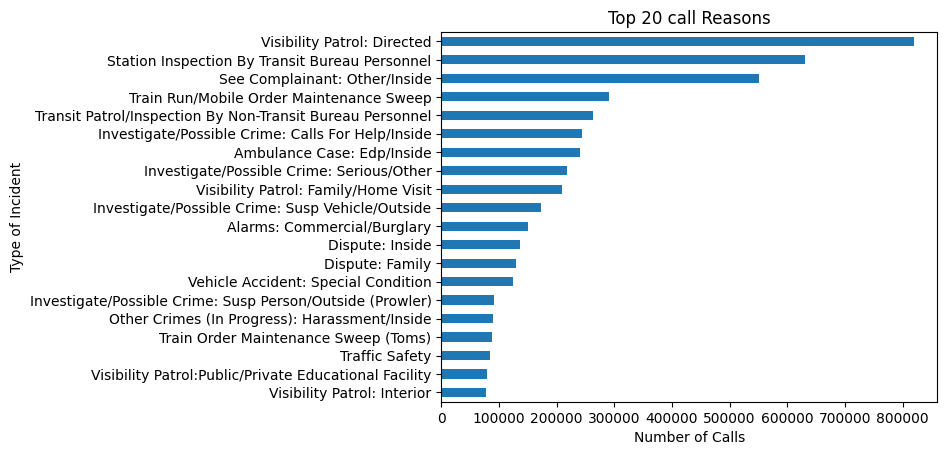

In [35]:
# Fequency of 911 calls by type between in 2023
plt.figure()
df_subset['Type_Description'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Type of Incident')

Text(0, 0.5, 'Frequency of calls (in millions)')

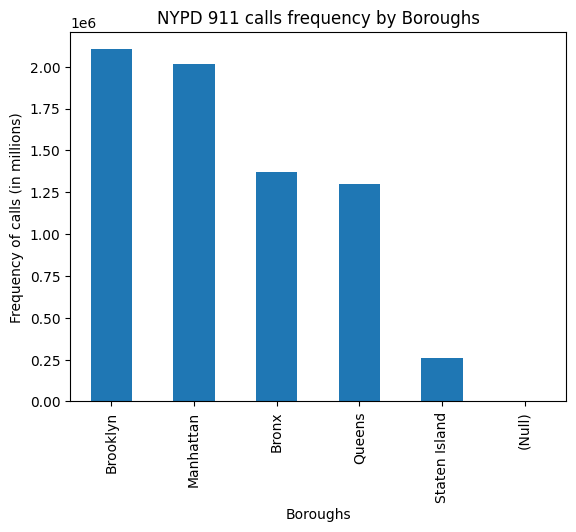

In [36]:
# Fequency of emergency calls by Borough
df_subset['Borough'].value_counts().plot(kind='bar')
plt.title('NYPD 911 calls frequency by Boroughs')
plt.xlabel('Boroughs')
plt.ylabel('Frequency of calls (in millions)')

Notice the (Null) values represented in the Boroughs column. Hence, Let's investigate why we have (Null) in the dataframe and take care of it.

In [37]:
df_subset_null = df_subset[df_subset['Neighborhood'] == '(Null)']
df_subset_null.head()

,Event_Id,Create_Date,Incident_Datetime,Incident_Ts,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
23635,91279467,2023-01-02,2023-01-02 09:21:13,09:21:13,Investigate/Possible Crime: Calls For Help/Inside,Non CIP,(Null),(Null),2023-01-02 09:21:13,2023-01-02 09:23:32,2023-01-02 09:21:05,2023-01-02 10:27:13,1029877,264537,40.892657,-73.834973
48791,91310217,2023-01-03,2023-01-03 15:55:39,15:55:39,See Complainant: Other/Inside,Non CIP,(Null),(Null),2023-01-03 15:55:39,2023-01-03 15:55:42,2023-01-03 15:55:44,2023-01-03 17:02:47,1065145,204561,40.727788,-73.708135
144967,91424805,2023-01-08,2023-01-08 03:05:23,03:05:23,See Complainant: Other/Inside,Non CIP,(Null),(Null),2023-01-08 03:05:23,2023-01-08 03:05:30,2023-01-08 03:05:33,2023-01-08 04:38:06,1060344,186954,40.679503,-73.725656
166766,91450828,2023-01-09,2023-01-09 08:35:18,08:35:18,Vehicle Accident: Special Condition,Non CIP,(Null),(Null),2023-01-09 08:35:18,2023-01-09 08:39:13,2023-01-09 08:35:16,2023-01-09 08:39:20,1056417,170820,40.635252,-73.739987
441369,91776286,2023-01-22,2023-01-22 04:06:42,04:06:42,See Complainant: Other/Inside,Non CIP,(Null),(Null),2023-01-22 04:06:42,2023-01-22 04:06:42,2023-01-22 04:06:42,2023-01-22 04:21:44,1060344,186954,40.679503,-73.725656


In [38]:
print (df_subset_null['Borough'].value_counts(),df_subset_null['Neighborhood'].value_counts(), sep='\n')

Borough
(Null)    153
Name: count, dtype: int64
Neighborhood
(Null)    153
Name: count, dtype: int64


The dataframe contains 153 'Null' string values as a consequence of imputation. Given that these represent less than 1% of the total dataset, I will exclude them from the dataframe.

In [39]:
# Filter out (Null) string values
df_subset = df_subset[df_subset['Neighborhood'] != '(Null)']

In [40]:
df_subset_null = df_subset[df_subset['Neighborhood'] == '(Null)']
df_subset_null.value_counts()

Series([], Name: count, dtype: int64)

Now we do not have (Null) values anymore let's plot the columns side by side

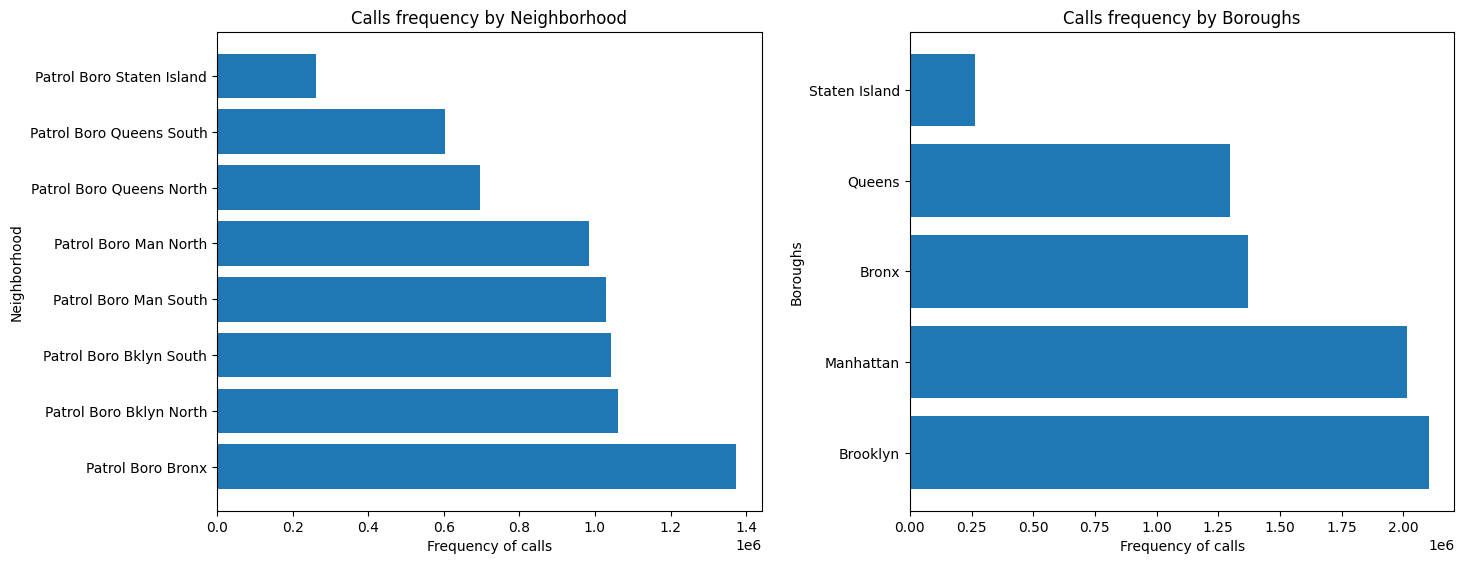

In [41]:
# Plt the Fequency of emergency calls by Boroughs 
b = df_subset['Borough'].value_counts()
n = df_subset['Neighborhood'].value_counts()
# figure and axes
fig, axes = plt.subplots(1,2, figsize=(15, 6))
# Plot value counts for Neighboorhood
axes[0].barh(n.index, n.values)
axes[0].set_title('Calls frequency by Neighborhood')
axes[0].set_ylabel('Neighborhood')
axes[0].set_xlabel('Frequency of calls')
# Plot value counts for Borough
axes[1].barh(b.index, b.values)
axes[1].set_title('Calls frequency by Boroughs')
axes[1].set_ylabel('Boroughs')
axes[1].set_xlabel('Frequency of calls')

# Display the plot automatically adjusting the layout with increased padding
plt.tight_layout(pad=2.0)


The "Neighborhood" column features information on the patrolled areas, specifically **The Boroughs of New York**. These are the five major administrative divisions: ***The Bronx, Brooklyn, Manhattan, Queens, and Staten Island***. For further details, refer to [The Boroughs of New York](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City). Consequently, I will update the names in the Neighborhood column to better represent the locations of the 911 calls.

In [42]:
# Extract everything after "Patrol Boro" and assign it to a new column 'neighborhood.' 
df_subset['Neighborhood'] = df_subset['Neighborhood'].str.extract('Patrol Boro (.*)')

In [43]:
# Replace neighborhoods abbreviations with their full name for clarity
df_subset['Neighborhood'] = df_subset['Neighborhood'].str.replace('Bklyn', 'Brooklyn').str.replace('Man', 'Manhattan')

In [44]:
# Preview dataframe 
df_subset['Neighborhood'].value_counts(dropna=False)

Neighborhood
Bronx              1372403
Brooklyn North     1060348
Brooklyn South     1042241
Manhattan South    1029134
Manhattan North     984443
Queens North        695478
Queens South        603501
Staten Island       262426
Name: count, dtype: int64

Text(0, 0.5, 'Neighborhoods')

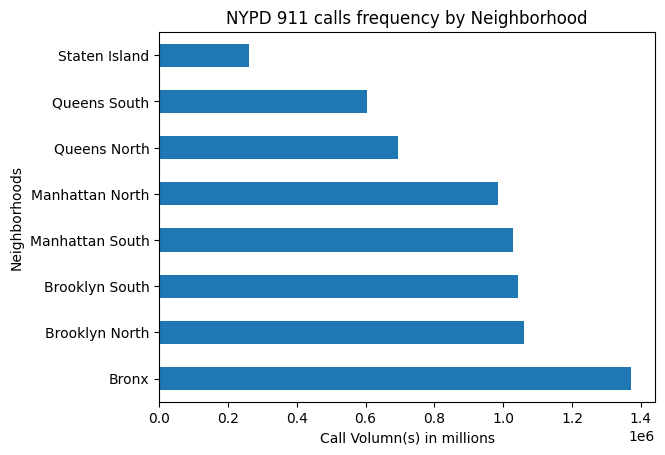

In [45]:
# Fequency of emergency calls by Boroughs and Neighborhood
df_subset['Neighborhood'].value_counts().plot(kind='barh')
plt.title('NYPD 911 calls frequency by Neighborhood')
plt.xlabel('Call Volumn(s) in millions')
plt.ylabel('Neighborhoods')

In [46]:
# Preview the dataset for null values
df_subset.isnull().sum()

Event_Id              0
Create_Date           0
Incident_Datetime     0
Incident_Ts           0
Type_Description      0
Call_Flag             0
Borough               0
Neighborhood          0
Time_Call_Added       0
Dispatch_Time         0
Time_Arrived          0
Closing_Time          0
Block_X_Coordinate    0
Block_Y_Coordinate    0
Latitude              0
Longitude             0
dtype: int64

In [47]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7049974 entries, 0 to 7050126
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Event_Id            int64         
 1   Create_Date         datetime64[ns]
 2   Incident_Datetime   datetime64[ns]
 3   Incident_Ts         object        
 4   Type_Description    object        
 5   Call_Flag           object        
 6   Borough             object        
 7   Neighborhood        object        
 8   Time_Call_Added     datetime64[ns]
 9   Dispatch_Time       datetime64[ns]
 10  Time_Arrived        datetime64[ns]
 11  Closing_Time        datetime64[ns]
 12  Block_X_Coordinate  int64         
 13  Block_Y_Coordinate  int64         
 14  Latitude            float64       
 15  Longitude           float64       
dtypes: datetime64[ns](6), float64(2), int64(3), object(5)
memory usage: 914.4+ MB


In [48]:
df_subset.head()

,Event_Id,Create_Date,Incident_Datetime,Incident_Ts,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31 23:24:39,23:24:39,Vehicle Accident: Injury,Non CIP,Brooklyn,Brooklyn South,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:57:44,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31 23:24:47,23:24:47,Alarms: Commercial/Burglary,Non CIP,Brooklyn,Brooklyn North,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,1017204,180778,40.662817,-73.881221
2,91250681,2023-01-01,2022-12-31 23:55:56,23:55:56,Alarms: Residential/Burglary,Non CIP,Queens,Queens North,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:44:33,2023-01-01 00:06:27,1008573,217117,40.762587,-73.912199
3,91250683,2023-01-01,2022-12-31 23:55:59,23:55:59,Alarms: Residential/Burglary,Non CIP,Brooklyn,Brooklyn South,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,993234,161780,40.610729,-73.967644
4,91250700,2023-01-01,2022-12-31 23:57:08,23:57:08,Alarms: Commercial/Burglary,Non CIP,Queens,Queens North,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,1014264,211852,40.748119,-73.891679


At this stage, the dataset has been meticulously cleaned, with missing values in the Officer Arrival time column addressed through forward and backward filling to reduce bias, although it's important to note that these imputed values will still influence the analysis to some extent. The data has been transformed, reorganized, and normalized, ready for detailed examination, and  the formation of specific subsets. Moreover, the geospatial data has been verified to confirm that the latitude and longitude values fall within acceptable ranges (Latitude between -90 and 90, Longitude between -180 and 180), which is crucial for accurate visualization. My next steps involve conducting exploratory data analysis (EDA) to delve into the data's details, pinpoint outliers, recognize unique values in categories such as types of incidents and locations, and uncover patterns in the frequency and geographical distribution of 911 calls, particularly focusing on neighborhoods with high incident rates. This process also includes identifying any anomalies or inaccurate entries that might suggest errors in data entry. After these steps, the data will be ready for advanced analysis, including Temporal Analysis, Geographical Distribution, Correlation, Pattern Identification, and Visualization, to derive meaningful insights. Now let's export the cleaned dataset.

In [49]:
# Export the cleaned data frame to a pickle file to serialize, save space, and retain datatypes
df_subset.to_pickle('~/Datasets/CLEANED/nypd_911_calls_clean.pkl')
# `index=False` means the DataFrame's index will not be written to the file.
# Optionally to include in export, set `index=True`.